In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from csv import writer
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0],True)

In [3]:
train_X = pd.read_csv('DataSet/trainX13.csv', header=None)
train_Y = pd.read_csv('DataSet/trainY13.csv', header=None)

trainY = train_Y.to_numpy()
trainX = train_X.to_numpy()
trainX = np.expand_dims(trainX,axis=2)

In [4]:
minimum = np.amin(trainX)
maximum = np.amax(trainX)

trainX = (trainX-minimum)/(maximum-minimum)

trainX_tensor =  tf.convert_to_tensor(trainX)
output = tf.nn.max_pool1d(trainX_tensor, 2, 2, padding='VALID')

In [5]:
numberOfWebsites = 14
def my_model_sddec():

    input_1 = keras.Input(shape = (3000,1))

    conv1d_1 = layers.Conv1D(256,16,strides=3,padding='valid',activation='relu',use_bias=True,kernel_initializer='VarianceScaling',bias_initializer = 'Zeros')(input_1)#possibly update kernel_initializer
    max_pooling1d_1 = layers.MaxPooling1D(pool_size = 4,strides = 4, padding = 'same')(conv1d_1)

    conv1d_2 = layers.Conv1D(128,8,strides=3,padding='valid',activation='relu',use_bias=True,kernel_initializer='VarianceScaling',bias_initializer = 'Zeros')(max_pooling1d_1)#possibly update kernel_initializer
    max_pooling1d_2 = layers.MaxPooling1D(pool_size = 4,strides = 4, padding = 'same')(conv1d_2)

    conv1d_3 = layers.Conv1D(32,8,strides=3,padding='same',activation='relu',use_bias=True,kernel_initializer='VarianceScaling',bias_initializer = 'Zeros')(max_pooling1d_2)#possibly update kernel_initializer
    max_pooling1d_2 = layers.MaxPooling1D(pool_size = 4,strides = 4, padding = 'same')(conv1d_3)

    # conv1d_1 = layers.Conv1D(256,16,strides=3,padding='valid',activation='relu',use_bias=True,kernel_initializer='VarianceScaling',bias_initializer = 'Zeros')(input_1)#possibly update kernel_initializer
    
    # max_pooling1d_1 = layers.MaxPooling1D(pool_size = 4,strides = 4, padding = 'same')(conv1d_1)
    
    # conv1d_2 = layers.Conv1D(32,8,strides=3,padding='same',activation='relu',use_bias=True,kernel_initializer='VarianceScaling',bias_initializer = 'Zeros')(max_pooling1d_1)#possibly update kernel_initializer

    # max_pooling1d_2 = layers.MaxPooling1D(pool_size = 4,strides = 4, padding = 'same')(conv1d_2)

    #lstm_1 = layers.LSTM(32,activation='tanh',recurrent_activation='hard_sigmoid',use_bias=True,kernel_initializer='VarianceScaling',recurrent_initializer = 'orthogonal',bias_initializer='Zeros', return_sequences = True)(max_pooling1d_2) #Variance Scaling

    flatten_1 = layers.Flatten()(max_pooling1d_2)
    
    #x = layers.Dense(200,activation = 'softmax')(flatten_1)

    #dropout_1 = layers.Dropout(0.3)(flatten_1)

    #dense_1 = layers.Dense(300,activation = 'relu')(dropout_1)

    #dropout_2 = layers.Dropout(0.5)(x)

    dense_2= layers.Dense(numberOfWebsites, kernel_regularizer = 'l2',activation = 'softmax', kernel_initializer = 'VarianceScaling', bias_initializer = 'zeros')(flatten_1)

    model = keras.Model(inputs = input_1, outputs = dense_2)
    return model

In [6]:

model = my_model_sddec()

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 995, 256)          4352      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 249, 256)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 128)           262272    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 21, 128)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 7, 32)             32800 

In [7]:
model.compile(
	loss=keras.losses.SparseCategoricalCrossentropy(),
	optimizer=keras.optimizers.Adam(),
	metrics=["accuracy"]
)

history = model.fit(output, trainY,validation_split = 0.3, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
37/37 [==============================] - 3s 12ms/step - loss: 2.3360 - accuracy: 0.2526 - val_loss: 2.0105 - val_accuracy: 0.4067
Epoch 2/25
37/37 [==============================] - 0s 7ms/step - loss: 1.3566 - accuracy: 0.6395 - val_loss: 1.3651 - val_accuracy: 0.6567
Epoch 3/25
37/37 [==============================] - 0s 6ms/step - loss: 0.7751 - accuracy: 0.8257 - val_loss: 0.9764 - val_accuracy: 0.8631
Epoch 4/25
37/37 [==============================] - 0s 6ms/step - loss: 0.5345 - accuracy: 0.8920 - val_loss: 0.7756 - val_accuracy: 0.8611
Epoch 5/25
37/37 [==============================] - 0s 7ms/step - loss: 0.4028 - accuracy: 0.9286 - val_loss: 0.9728 - val_accuracy: 0.8214
Epoch 6/25
37/37 [==============================] - 0s 7ms/step - loss: 0.3393 - accuracy: 0.9439 - val_loss: 0.6623 - val_accuracy: 0.9048
Epoch 7/25
37/37 [==============================] - 0s 6ms/step - loss: 0.2592 - accuracy: 0.9609 - val_loss: 0.6468 - val_accuracy: 0.9147
Epoch 8/25
37/37 [=

In [8]:
model.save('TrainedModel/trainedModel.h5',save_format='h5')

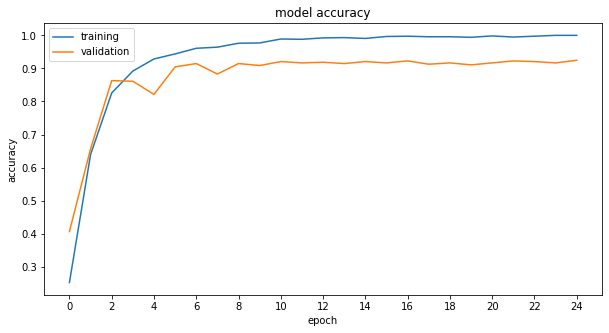

In [9]:

fig = plt.figure(figsize=(10,5))


#plotting

plt.locator_params(axis="x", nbins=20)
plt.locator_params(axis="y", nbins=10)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='upper left')
fig.savefig('plot.png',dpi=200)

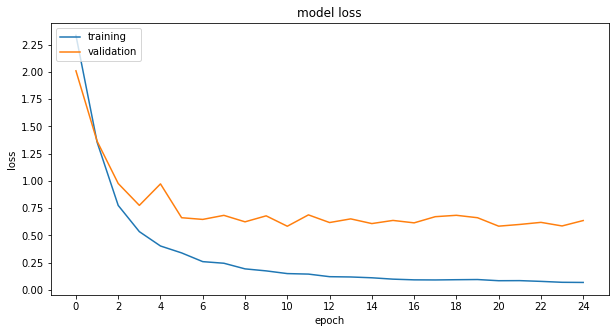

In [10]:

fig = plt.figure(figsize=(10,5))


#plotting

plt.locator_params(axis="x", nbins=20)
plt.locator_params(axis="y", nbins=10)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='upper left')
fig.savefig('plot.png',dpi=200)